In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
saved_path='user_prediction/evaluating_on_'
flair_eval_all=pd.read_csv(saved_path+'flair_6.tsv',sep='\t').drop(columns=['Unnamed: 0'])
gold_eval_all=pd.read_csv(saved_path+"gold_6.tsv",sep='\t').drop(columns=['Unnamed: 0'])
silver_eval_all=pd.read_csv(saved_path+"silver_6.tsv",sep='\t').drop(columns=['Unnamed: 0'])

In [3]:
def reset_score(score,politics):
    return (2*score-1)*politics+1-score

In [4]:
silver_eval_all.head()

,username,predict_score_flair,predict_politics_flair,predict_score_gold,predict_politics_gold,predict_score_silver,predict_politics_silver,real_politics
0,--------_-------,0.837797,1,0.914665,1,0.825370,1,1
1,--444--,0.760180,0,0.674700,1,0.848704,0,0
2,--orb,0.982370,0,0.898093,0,0.559690,1,1
3,-AragornElessar-,0.878367,0,0.759026,1,0.712902,0,0
4,-Dee-Dee-,0.876433,1,0.915573,1,0.513045,0,1


In [5]:
flair_eval_all['predict_score_flair']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
flair_eval_all['predict_score_gold']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
flair_eval_all['predict_score_silver']=flair_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)

gold_eval_all['predict_score_flair']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
gold_eval_all['predict_score_gold']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
gold_eval_all['predict_score_silver']=gold_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)

silver_eval_all['predict_score_flair']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_flair, x.predict_politics_flair), axis=1)
silver_eval_all['predict_score_gold']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_gold, x.predict_politics_gold), axis=1)
silver_eval_all['predict_score_silver']=silver_eval_all.apply(lambda x: reset_score(x.predict_score_silver, x.predict_politics_silver), axis=1)


# Kde

<AxesSubplot:ylabel='Density'>

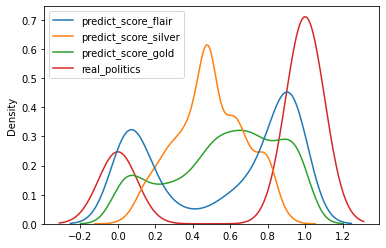

In [6]:
sns.kdeplot(data=flair_eval_all[['predict_score_flair','predict_score_silver','predict_score_gold','real_politics']])

<AxesSubplot:ylabel='Density'>

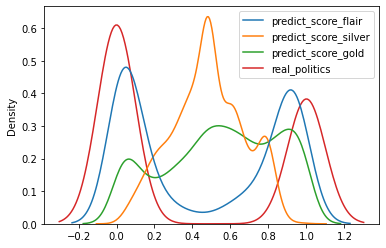

In [17]:
sns.kdeplot(data=gold_eval_all[['predict_score_flair','predict_score_silver','predict_score_gold','real_politics']])

<AxesSubplot:ylabel='Density'>

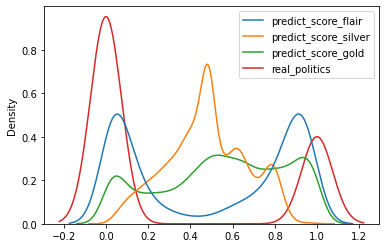

In [18]:
sns.kdeplot(data=silver_eval_all[['predict_score_flair','predict_score_silver','predict_score_gold','real_politics']])

<AxesSubplot:ylabel='Density'>

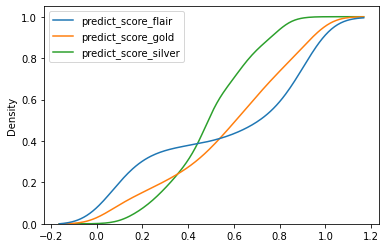

In [11]:
sns.kdeplot(
    data=flair_eval_all[['predict_score_flair','predict_score_gold','predict_score_silver']],
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

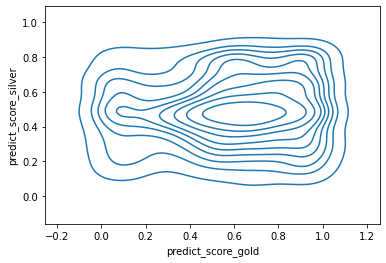

In [11]:
sns.kdeplot(data=flair_eval_all, x="predict_score_gold", y="predict_score_silver")

In [8]:
flair_eval_all['predict_score_gold'].corr(gold_eval_all['predict_score_silver'])

0.045941526890683995

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

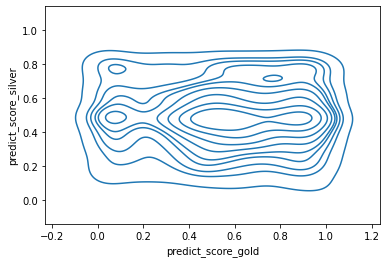

In [9]:
sns.kdeplot(data=gold_eval_all, x="predict_score_gold", y="predict_score_silver")

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

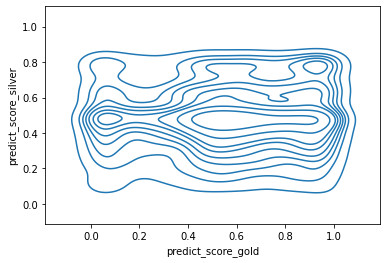

In [16]:
sns.kdeplot(data=silver_eval_all, x="predict_score_gold", y="predict_score_silver")

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

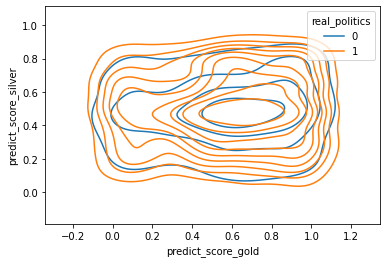

In [17]:
sns.kdeplot(data=flair_eval_all, x="predict_score_gold", y="predict_score_silver",hue='real_politics')

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

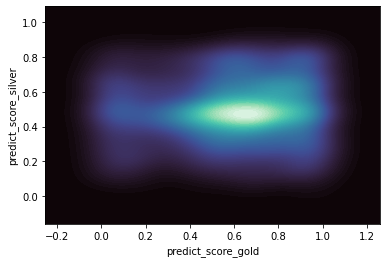

In [18]:
sns.kdeplot(data=flair_eval_all, x="predict_score_gold"
            , y="predict_score_silver",fill=True, thresh=0, levels=100, cmap="mako")

<AxesSubplot:xlabel='predict_score_flair', ylabel='predict_score_silver'>

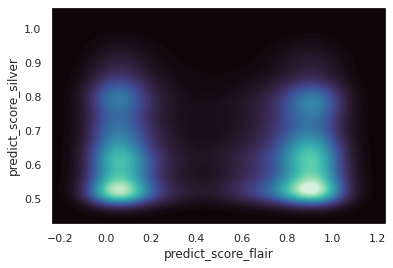

In [27]:
sns.kdeplot(data=silver_eval_all, x="predict_score_flair"
            , y="predict_score_silver",fill=True, thresh=0, levels=100, cmap="mako")

# Bivariate

<AxesSubplot:xlabel='predict_score_flair', ylabel='predict_score_silver'>

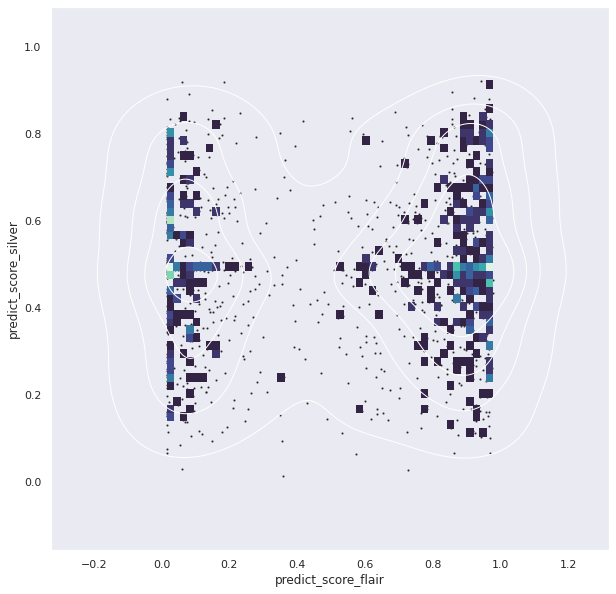

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=flair_eval_all['predict_score_flair'], y=flair_eval_all['predict_score_silver'], s=5, color=".15")
sns.histplot(x=flair_eval_all['predict_score_flair'], y=flair_eval_all['predict_score_silver'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=flair_eval_all['predict_score_flair'], y=flair_eval_all['predict_score_silver'], levels=5, color="w", linewidths=1)

<AxesSubplot:xlabel='predict_score_flair', ylabel='predict_score_silver'>

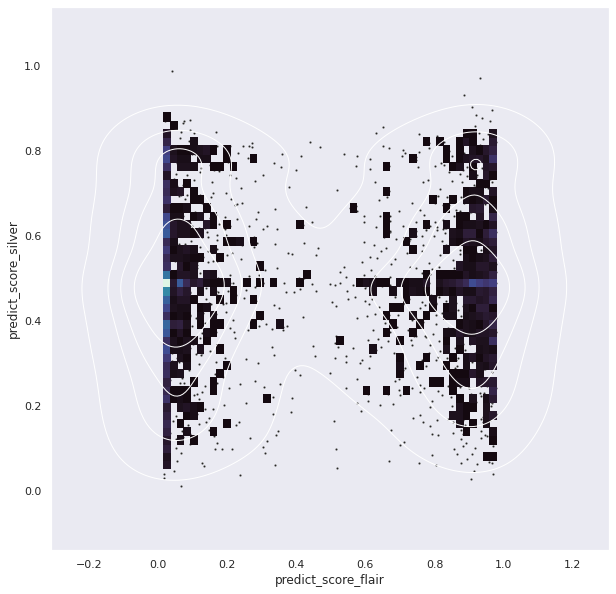

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=gold_eval_all['predict_score_flair'], y=gold_eval_all['predict_score_silver'], s=5, color=".15")
sns.histplot(x=gold_eval_all['predict_score_flair'], y=gold_eval_all['predict_score_silver'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=gold_eval_all['predict_score_flair'], y=gold_eval_all['predict_score_silver'], levels=5, color="w", linewidths=1)

<AxesSubplot:xlabel='predict_score_gold', ylabel='predict_score_silver'>

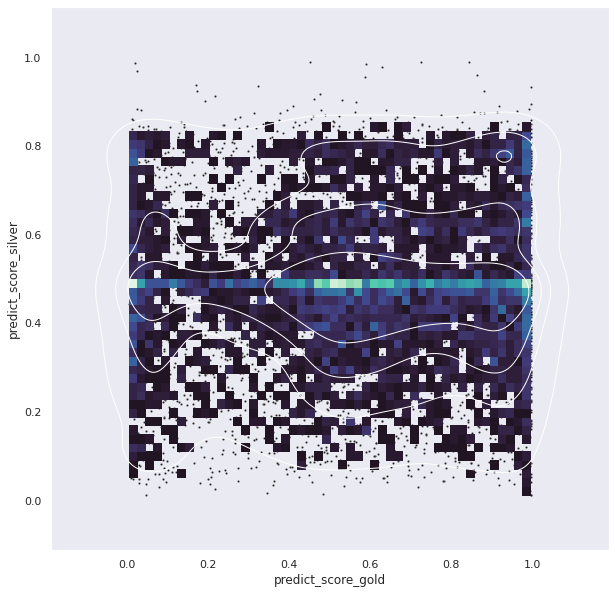

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=silver_eval_all['predict_score_gold'], y=silver_eval_all['predict_score_silver'], s=5, color=".15")
sns.histplot(x=silver_eval_all['predict_score_gold'], y=silver_eval_all['predict_score_silver'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=silver_eval_all['predict_score_gold'], y=silver_eval_all['predict_score_silver'], levels=5, color="w", linewidths=1)